<a href="https://colab.research.google.com/github/LucioFassarella/SimulacoesComputacionaisQuanticas/blob/main/Qiskit_Simulacao_HamiltonianoConstante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Álgebra Vetorial Quântica

---

<font color = "yellow">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="yellow">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)

*	[Choose the execution mode](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="yellow">**Local simulators**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)

---

⏬

## <font color = "orange">Introdução à Computação Quântica</font>







# Qubit com Hamiltoniano Constante


Dados $a,b,c \in \mathbb{R}$, definimos o Hamiltoniano

$$
\begin{split}
H &= aX +bY +cZ\\
	&= \begin{pmatrix}
		c & a - bi\\
		a + bi & -c
	\end{pmatrix}
\end{split}
$$
Solução da equação de Schrödinger:
$$
|\psi(t)\rangle = e^{-iHt/\hbar}|\psi(0)\rangle.
$$

**Trotterização**

$$
\begin{split}
	e^{-iH\Delta t/\hbar} &= e^{-iaX \Delta t/2\hbar}e^{-ibY \Delta t/2\hbar}e^{-icZ \Delta t/\hbar}e^{-ibY \Delta t/2\hbar}e^{-iaX \Delta t/2\hbar} + O(\Delta t^3).
\end{split}
$$
Assim:
$$
\begin{split}
	|\psi(t)\rangle &\approx \prod_{k=1}^{n} [e^{-i\frac{at/\hbar}{2n}X}e^{-i\frac{bt/\hbar}{2n}Y}e^{-i\frac{ct/\hbar}{n}Z}e^{-i\frac{bt/\hbar}{2n}Y}e^{-i\frac{at/\hbar}{2n}X}]\\
	&= \prod_{k=1}^{n} \left\lbrack R_X\left(\frac{at/\hbar}{n}\right)R_Y\left(\frac{bt/\hbar}{n}\right)R_Z\left(2\frac{ct/\hbar}{n}\right)R_Y\left(\frac{bt/\hbar}{n}\right)R_X\left(\frac{at/\hbar}{n}\right)\right\rbrack.
\end{split}
$$

# QISKIT: Carregamento

In [3]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

'2.2.3'

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Conecção com a IBM

token_privado = "7zAryvcpz2cTOgAbliiOL_A4qMyxg5Vq3nuHiBs1VENt" # <-- Inserir token privado na IBM
instance_do_projeto = "crn:v1:bluemix:public:quantum-computing:us-east:a/8e99d0dd96d44fd08e92d06df59c1d0a:8c991a39-9205-4233-9c72-dda37b057ae6::" # <-- Inserir instance do projeto

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token = token_privado,
    instance = instance_do_projeto
    )

## Save account to disk and save it as the default.
#QiskitRuntimeService.save_account(channel="ibm_cloud", token="<IBM Cloud API key>", instance="<IBM Cloud CRN>", name="account-name", set_as_default=True)

## Load the saved credentials
#service = QiskitRuntimeService(name="account-name")

qiskit_runtime_service._discover_account:WARNING:2025-11-15 20:43:44,503: Loading account with the given token. A saved account will not be used.


In [5]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

## Método de Primitivos



In [6]:
def qiskit_sampler(circuito_com_medidas, shots = None, backend = None):
    '''
    Método para executar o Sampler
    >>> O Sampler realiza medidas em circuitos quânticos e retorna a contagem de qubits.
        A partir dos resultados do Sampler, podemos estimar as probabilidade de cada resultado.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        backend  : backend para rodar o Sampler

    Saída:
        resultado do Sampler

    Observação: os resultados do Sampler são rotulados pelo nomes dos registros clássicos.
                Para um circuito com medidas definidas por 'measure_all', o rótulo é 'meas'.
                Para circuitos com medidas definidas de início sem denominação explícita,
                os rótulos são 'c', 'c1', 'c2', etc.

    Tutorial do Sampler: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import SamplerV2 as Sampler

    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    from qiskit.transpiler import generate_preset_pass_manager
    pm = generate_preset_pass_manager(optimization_level=2, backend = backend)

    # Transpilação

    isa_circuitos = pm.run(circuito_com_medidas)

    if shots is None:
        shots = 2**10
    else:
        shots = shots

    sampler = Sampler(backend)
    job = sampler.run([(isa_circuitos, )], shots = shots)
    result = job.result()
    counts = result[0].data['c'].get_counts()

    return counts, result

def qiskit_estimator(circuito_sem_medidas, hamiltoniano, precisao = None, backend = None):
    '''
    Método para executar o Estimator
    >>> O Estimator estima valores esperados de circuitos e observáveis.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        hamiltoniano (SparsePauliOp): hamiltoniano a ser medido
        precisao (float): precisão do resultado
        backend  : backend para rodar o Estimator

    Saída:
        resultado do Estimator

    Tutorial do EstimatorV2: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/estimator-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import EstimatorV2 as Estimator
    from qiskit.transpiler import generate_preset_pass_manager

    # Use the existing service object
    # service = QiskitRuntimeService()
    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    if precisao is None:
        precisao = 2**(-10)
    else:
        precisao = precisao

    # Transpilação

    pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
    isa_circuito = pm.run(circuito_sem_medidas)
    isa_hamiltoniano = hamiltoniano.apply_layout(isa_circuito.layout)

    # Estimator:

    estimator = Estimator(mode=backend)

    # Job
    job = estimator.run([(isa_circuito, isa_hamiltoniano, )], precision = precisao)
    pub_result = job.result()[0]

    return pub_result.data.evs

# Caso $$a = b = c = 1$$

Dados de entrada
$$
\begin{split}
a, b, c = 1:\ \text{Parâmetros do hamiltoniano};\\
T > 0 &:\ \text{Intervalo de evolução};\\
n \in \mathbb{N} &:\ \text{Número de partições no intervalo}
\end{split}
$$

Circuito:


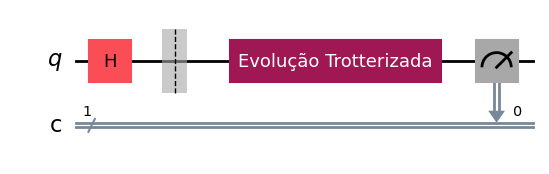

Circuito decomposto:


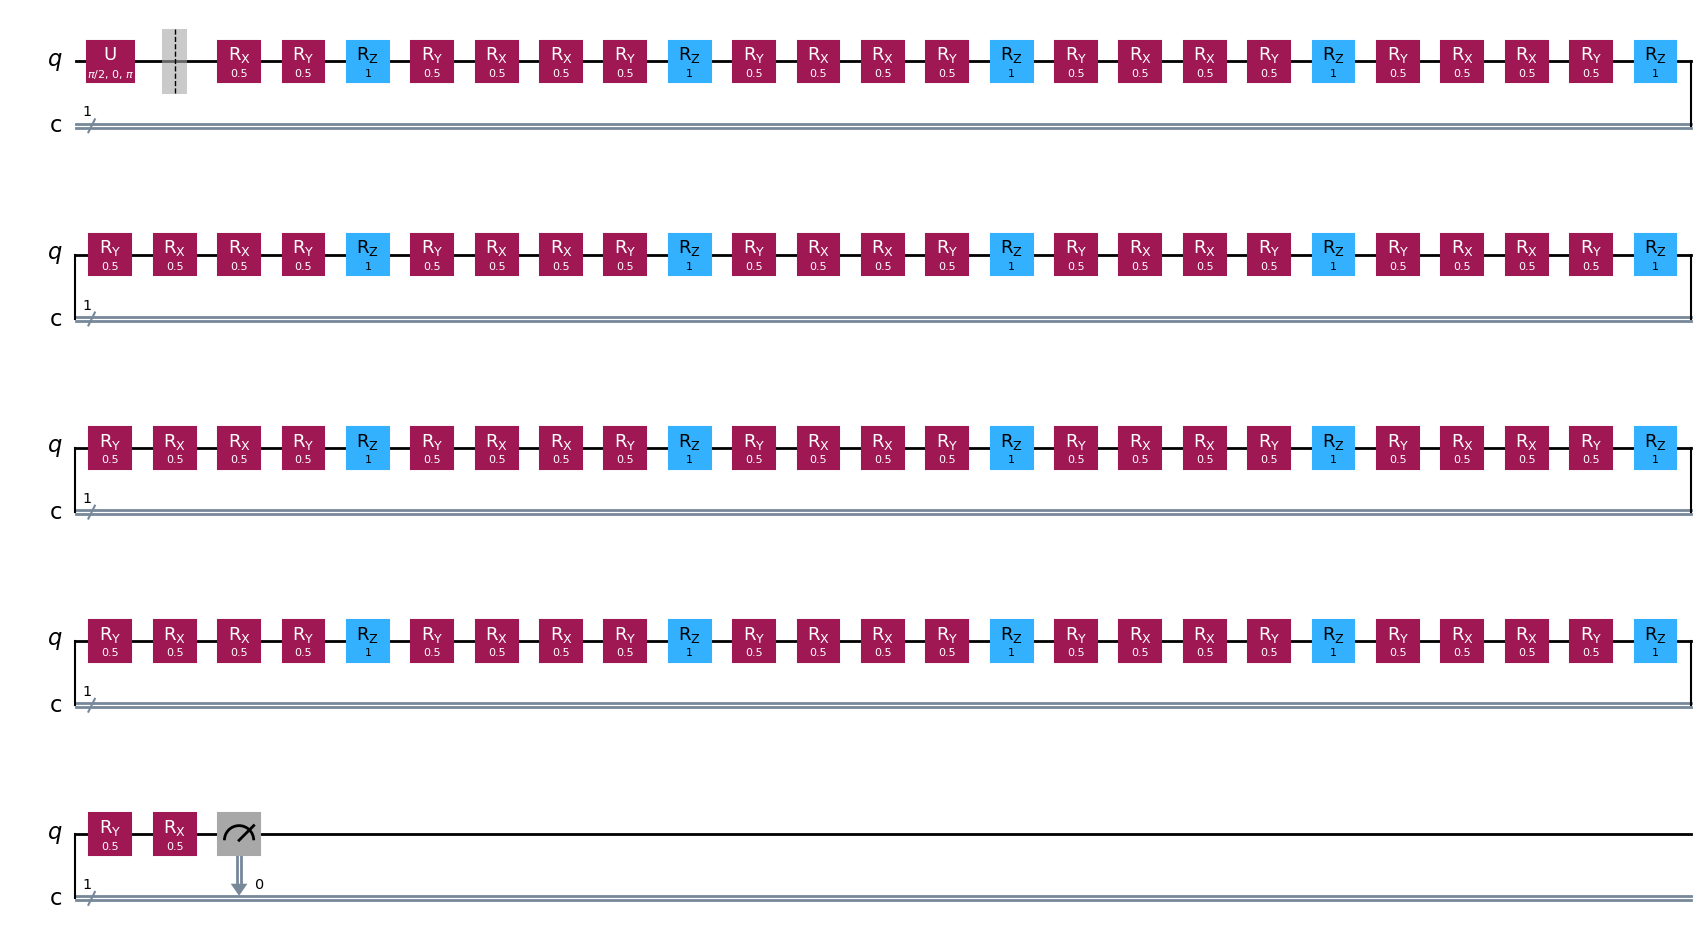

In [28]:
#Dados de entrada:

a = 1; b = 1; c = 1
T = 10
n = 20

dt = float(T/n)

# Circuito
qc = QuantumCircuit(1,1)

# Preparação do estado inicial:
qc.h(0)
qc.barrier()

# Evolução temporal trotterizada:
def evolucao(k = int, dt = float):
    evol = QuantumCircuit(1, name = "Evolução Trotterizada")
    for j in range(1, k+1):
        evol.rx(dt,0)
        evol.ry(dt,0)
        evol.rz(2*dt,0)
        evol.ry(dt,0)
        evol.rx(dt,0)
    return evol

qc.append(evolucao(n, dt), [0])

# Medida
qc.measure(0,0)

# Plot
print("Circuito:")
display(qc.draw('mpl'))
print("Circuito decomposto:")
qc.decompose().draw('mpl')

In [31]:
estado = qiskit_sampler(qc)
estado

({'0': 423, '1': 601},
 PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2}))

Instante = 0 >>> Frequências: {'1': 506, '0': 518}
Estado vetor: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


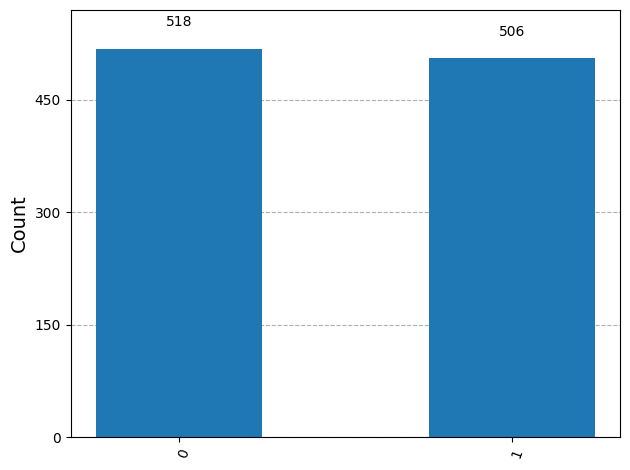

Instante = 0.3333333333333333 >>> Frequências: {'0': 414, '1': 610}
Estado vetor: Statevector([-0.12830009-0.60463893j,  0.57135776-0.53990848j],
            dims=(2,))


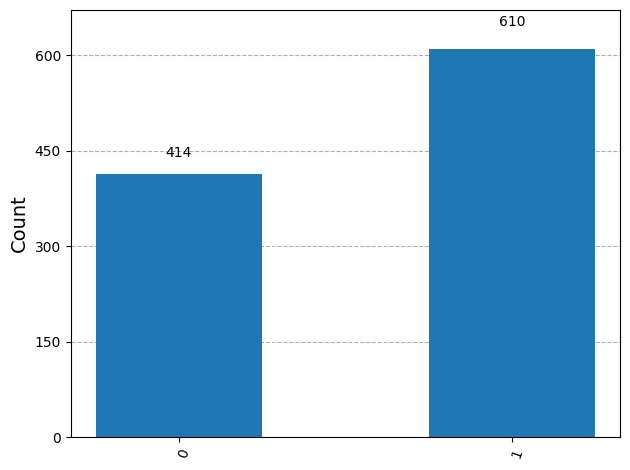

Instante = 0.6666666666666666 >>> Frequências: {'0': 471, '1': 553}
Estado vetor: Statevector([ 0.37645251+0.5648273j , -0.53373748+0.50435894j],
            dims=(2,))


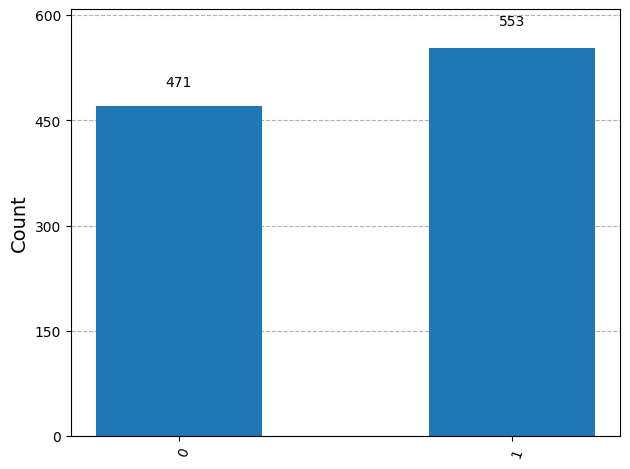

Instante = 1.0 >>> Frequências: {'0': 755, '1': 269}
Estado vetor: Statevector([ 0.78368915+0.37870325j, -0.35785827+0.33816065j],
            dims=(2,))


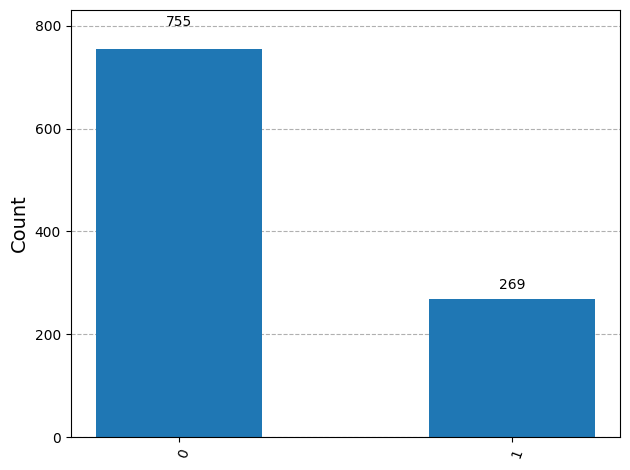

Instante = 1.3333333333333333 >>> Frequências: {'0': 923, '1': 101}
Estado vetor: Statevector([0.93624009-0.21421691j, 0.20242575-0.19128362j],
            dims=(2,))


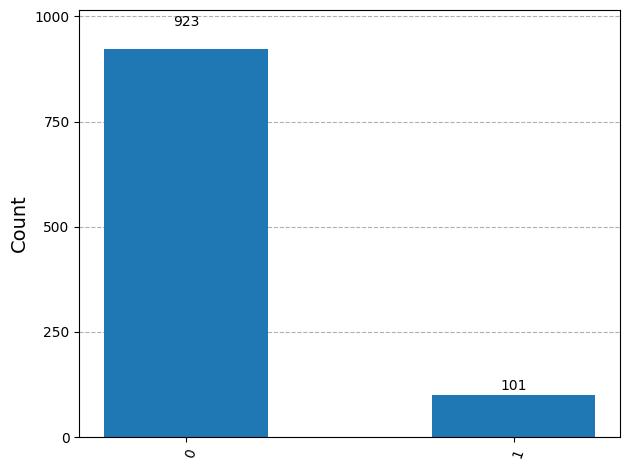

Instante = 1.6666666666666665 >>> Frequências: {'0': 734, '1': 290}
Estado vetor: Statevector([-0.74910057-0.40388481j,  0.38165376-0.36064637j],
            dims=(2,))


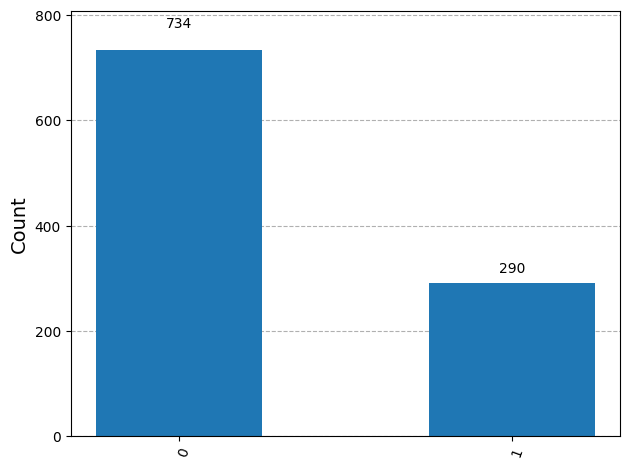

Instante = 2.0 >>> Frequências: {'0': 908, '1': 116}
Estado vetor: Statevector([0.96859868-0.15158382j, 0.14324018-0.13535581j],
            dims=(2,))


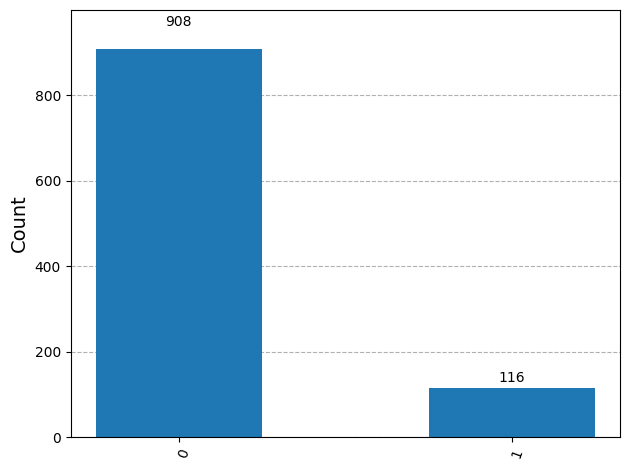

Instante = 2.333333333333333 >>> Frequências: {'1': 468, '0': 556}
Estado vetor: Statevector([-0.59010163-0.49221045j,  0.46511768-0.43951619j],
            dims=(2,))


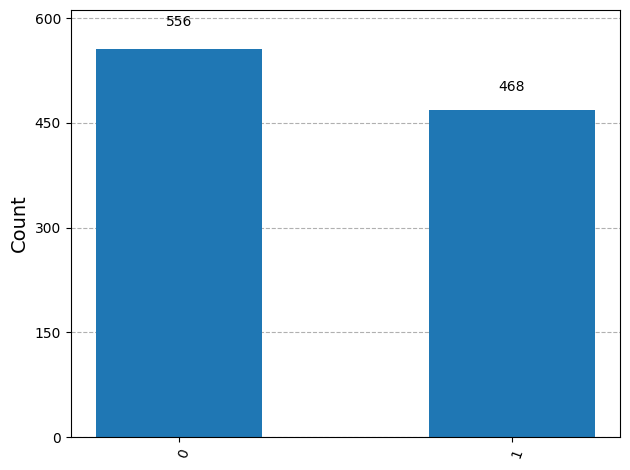

Instante = 2.6666666666666665 >>> Frequências: {'0': 730, '1': 294}
Estado vetor: Statevector([ 0.98388446+0.10901367j, -0.10301323+0.09734307j],
            dims=(2,))


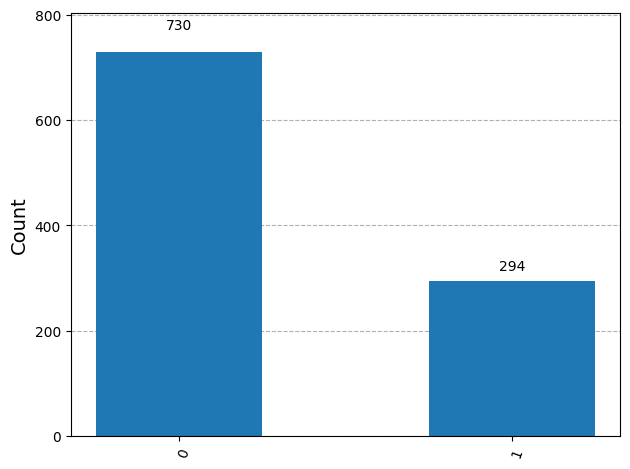

Instante = 3.0 >>> Frequências: {'0': 494, '1': 530}
Estado vetor: Statevector([0.22884364-0.59349878j, 0.56083079-0.52996095j],
            dims=(2,))


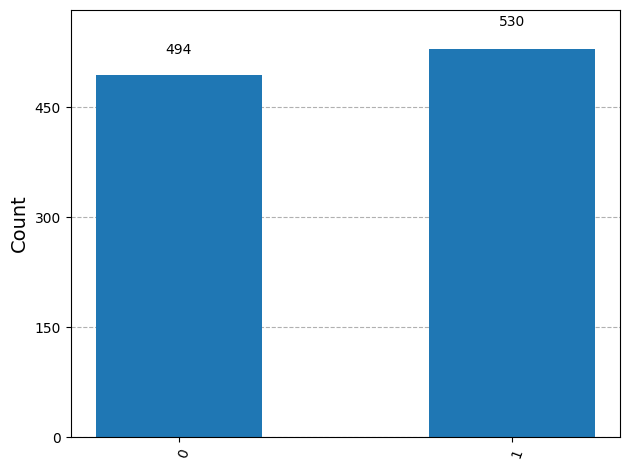

Instante = 3.333333333333333 >>> Frequências: {'1': 502, '0': 522}
Estado vetor: Statevector([-0.32699741+0.57616079j, -0.54444714+0.51447911j],
            dims=(2,))


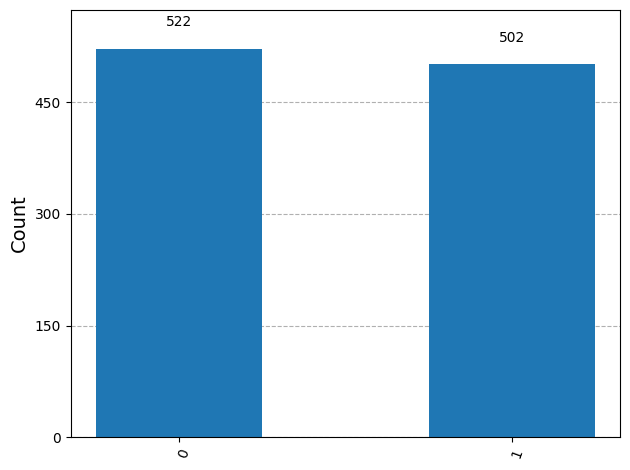

Instante = 3.6666666666666665 >>> Frequências: {'1': 493, '0': 531}
Estado vetor: Statevector([-0.51207121+0.52367837j, -0.49485351+0.46761527j],
            dims=(2,))


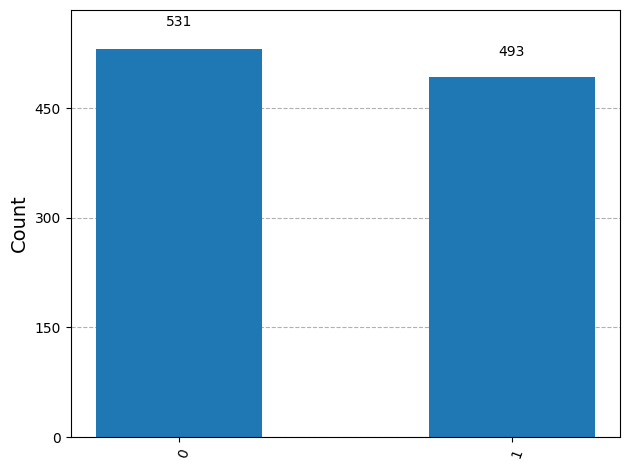

Instante = 4.0 >>> Frequências: {'0': 518, '1': 506}
Estado vetor: Statevector([-0.81139458+0.35635587j, -0.33674095+0.3182057j ],
            dims=(2,))


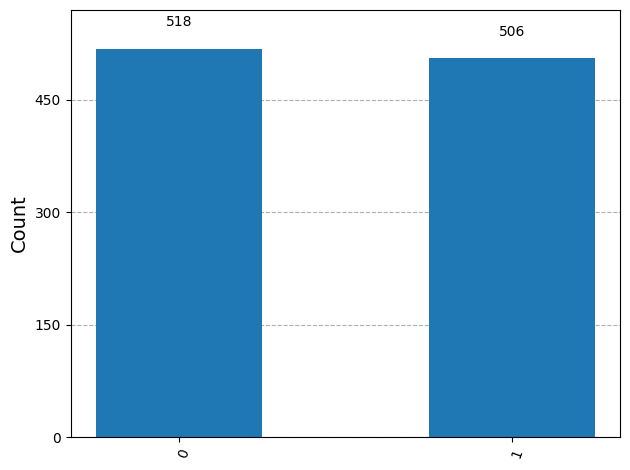

Instante = 4.333333333333333 >>> Frequências: {'0': 529, '1': 495}
Estado vetor: Statevector([-0.98131467-0.11730793j,  0.11085095-0.10474937j],
            dims=(2,))


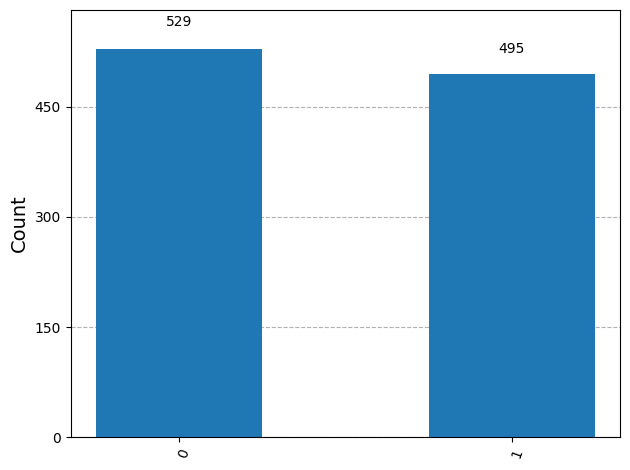

Instante = 4.666666666666666 >>> Frequências: {'1': 523, '0': 501}
Estado vetor: Statevector([0.25570772-0.58940842j, 0.55696558-0.52630849j],
            dims=(2,))


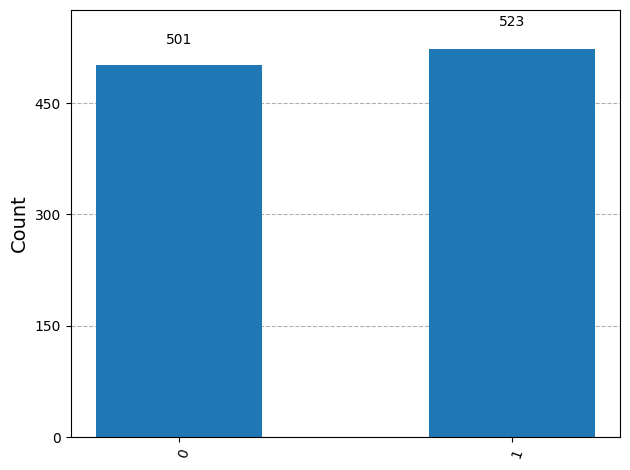

Instante = 5.0 >>> Frequências: {'1': 515, '0': 509}
Estado vetor: Statevector([-0.37880494+0.56424238j, -0.53318476+0.50383664j],
            dims=(2,))


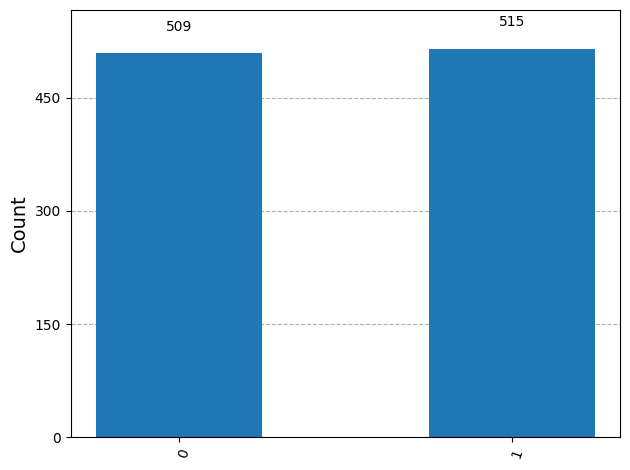

Tempo de execução: 267.50491881370544


In [7]:
from typing import final
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import time

inicio = time.time()

#Dados de entrada:

a = 1; b = 1; c = 1
T = 5
T_plot = 1
n_plot = 3

dt_plot = float(T_plot/n_plot)


# Circuito
qc = QuantumCircuit(1)

# Preparação do estado inicial:
qc.h(0)

# Evolução temporal trotterizada fracionada:
def evolucao_plot(qc_prep, T_plot, n_plot = int, dt_plot = float):
    '''
    qc_prep : circuito quântico que prepara o estado inicial
    '''
    qc_plot = QuantumCircuit(1)
    qc_plot.append(qc_prep, [0])
    qc_plot.barrier()

    for j in range(1, n_plot + 1):
        qc_plot.rx(dt_plot,0)
        qc_plot.ry(dt_plot,0)
        qc_plot.rz(2*dt_plot,0)
        qc_plot.ry(dt_plot,0)
        qc_plot.rx(dt_plot,0)
    return qc_plot

instantes_total = int(np.ceil(T/dt_plot))

# Preparação
instante = 0
circ = QuantumCircuit(1,1)
circ.append(qc, [0])
circ.measure(0,0)
frequencia = qiskit_sampler(circ)
print(f"Instante = {instante} >>> Frequências: {frequencia[0]}")
estadovetor = Statevector.from_instruction(qc)
print(f"Estado vetor: {estadovetor}")
display(plot_histogram(frequencia[0]))

# Evolução com prints de instantes
for k in range(1, instantes_total + 1):
    instante = k*dt_plot
    circ = QuantumCircuit(1,1)
    qc_prep = qc.copy()
    qc.append(evolucao_plot(qc_prep, T_plot, n_plot, dt_plot),[0]) # Fração da evolução temporal
    circ.append(qc,[0])
    circ.measure(0,0)
    frequencia = qiskit_sampler(circ)
    print(f"Instante = {instante} >>> Frequências: {frequencia[0]}")
    estadovetor = Statevector.from_instruction(qc)
    print(f"Estado vetor: {estadovetor}")
    display(plot_histogram(frequencia[0]))

final = time.time()
print(f"Tempo de execução: {(final - inicio)/60} minutos")